# What factors affect car sales

We are analyst at Crankshaft List. Hundreds of free vehicle ads are served on your website every day. We need to study datasets over the last few years and determine the factors that influence the price of a vehicle.

# Content <a id='back'></a>

* [Introduction](#intro)
* [Data Preprocessing](#pre-dataprocessing)
    * [Load Data](#data_load)
    * [EDA](#data_explore)
    * [Conclusion](#conclusion)
    * [Misisng Values](#missing_values)
    * [Data Type](#data_type)
    * [Data Quality](#data_quality)
    * [Checking Data](#data_cleansing)
* [Check The Parameter](#parameter)
    * [Dealing With Outliers](#outlier)
    * [Remove Outliers](#without_outlier)
    * [Ads Periode](#ads_periode)
    * [Average Price Each Type of Vehicle](#average_price)
    * [Price Factor](#price_factor)
* [General Conclusion](#general_conclusion)

## Introduction <a id='intro'></a>

Whenever we do research, we need to formulate a hypothesis that we can then test. Sometimes we accept this hypothesis, but sometimes we also reject it. To make the right decisions, a business must be able to understand whether the assumptions it makes are correct or not.

### Objectives: 
Testing three hypotheses:
1. Look for factors that affect vehicle prices from the parameters of vehicle age, mileage, transmission, and vehicle color.
2. Find the average price for each type of vehicle.
3. Calculates the average days for ads served.

### Step
Data about the vehicles with served ads is stored in the file `/datasets/vehicles_us.csv'.csv`. The data is still raw data, the data quality needs to be improved.

Following are the steps to achieve the project objectives:
 1. Read Raw Data
 2. Pre-processing of Data
 3. Dealing with Outliers
 4. Test Clean Data

 
[Home](#back)

## Pre-processing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [4]:
df = pd.read_csv('/datasets/vehicles_us.csv')

### EDA

Your *Dataset* contains the following fields:


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, and others.
- `odometer` — mileage of the vehicle when the ad is displayed 
- `transmission`
- `paint_color`
- `is_4wd` — does the vehicle have 4 wheel drive (Boolean type)
- `date_posted` — the date the ad was shown 
- `days_listed` — the number of days the ad served until it was removed 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
df.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [7]:
df.tail(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [8]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


<div style="background-color:rgba(0, 255, 172, 0.07)"

- min price = 1 and there may be outliers
- min odometer = 0 and there may be outliers
- min day_listed = 0

</div>

In [7]:
df.duplicated().sum()

0

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
No duplicate values
     
</div>

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*Type Data
    
- model_year is still a float it should be an int
- cylinder still float should be int
- odometer still float should be int
- is_4wd is still a float supposed to be int / bool
- date_posted is still a float it should be a date
    
</div>

In [9]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [10]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*Bernilai NaN

- model_year ~7%
- cylinder ~10%
- odometer ~15%
- paint_color ~17%
- is_4wd ~50%
</div>

### Conclusion and Next Steps

<div style="background-color:rgba(0, 255, 172, 0.07)"

- Fixed descriptive statistics in the price, odometer, and day_listed columns and removed outliers
- No duplicate values ​​so no need to remove duplicate values
- Fixed the data type in the model_year, cylinder, is_4wd, and date_posted columns
- Fixed NaN values ​​in the model_year, cylinder, odometer, paint_color and is_4wd columns

</div>

## Missing Values

In [12]:
#Function missing values with with mean
def mean_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].mean().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column] == group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [13]:
#FFunction filling missing values with median
def median_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [14]:
df['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 68, dtype: int64

In [15]:
df['model_year'].sort_values().unique()

array([1908., 1929., 1936., 1948., 1949., 1954., 1955., 1958., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019.,   nan])

In [16]:
df = mean_missing_value(df, 'model', 'model_year')

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Fill in the blank values ​​in model_year based on the model group using the mean because from the previous descriptive table the mean in the model_year column is around 2009 and the median is 2011. So there is little possibility of outliers.
     
</div>

In [17]:
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [18]:
df['cylinders'].sort_values().unique()

array([ 3.,  4.,  5.,  6.,  8., 10., 12., nan])

In [19]:
df = mean_missing_value(df, 'model', 'cylinders')

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Fill in the missing values ​​in the cylinders based on the model group using the mean because from the previous descriptive table the mean in the cylinders is around 6.1 and the median is 6. So there is little possibility of outliers.
     
</div>

In [20]:
df['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
280499.0      1
49814.0       1
194920.0      1
140800.0      1
269527.0      1
Name: odometer, Length: 17762, dtype: int64

In [21]:
df['odometer'].unique()

array([145000.,  88705., 110000., ..., 121778., 181500., 139573.])

In [22]:
df = median_missing_value(df, 'model_year', 'odometer')

In [23]:
df[df['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


In [24]:
df.groupby('model_year')['odometer'].median()

model_year
1908.000000    169328.0
1929.000000         NaN
1936.000000     30000.0
1948.000000      4000.0
1949.000000      1800.0
                 ...   
2016.000000     54000.0
2017.000000     41000.0
2017.414557     27493.0
2018.000000     20627.0
2019.000000     14151.5
Name: odometer, Length: 167, dtype: float64

In [25]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,51525.000000,51525.000000,51524.000000,25572.0,51525.00000
mean,12132.464920,2009.749939,6.124281,115194.162856,1.0,39.55476
std,10040.803015,6.096916,1.644649,62117.195345,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2007.000000,4.000000,73370.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,114000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,152862.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [26]:
odometer_median = df['model_year'] == 1929
df.loc[odometer_median, 'odometer'] = df.loc[odometer_median, 'odometer'].fillna(114000)

In [27]:
df[df['model_year'] == 1929]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,114000.0,manual,other,silver,NaN,2018-11-18,59


<div style="background-color:rgba(0, 255, 172, 0.07)"

- Fill in the missing values ​​on the odometer based on the model_year group using the median because from the previous descriptive table the mean in cylinders is around 115.553 and the median is 113.000. So most likely there are outliers.
- It should be noted that the model_year is 1929, even though it has performed the function, the value is still NaN, for this it needs to be filled in manually using the median descriptive table.
     
</div>

In [28]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [29]:
df['paint_color'].sort_values().unique()

array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange',
       'purple', 'red', 'silver', 'white', 'yellow', nan], dtype=object)

In [30]:
df['paint_color'] = df['paint_color'].fillna('unknown')

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Filling in missing values ​​in paint_color is temporarily filled with 'unknown' because the data is qualitative data and has no relationship with other column groups
     
</div>

In [31]:
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [32]:
df['is_4wd'].sort_values().unique()

array([ 1., nan])

In [33]:
df['is_4wd'] = df['is_4wd'].fillna(0)

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Filling in missing values ​​in is_4wd is filled with 0 because the column has a boolean value, so other than 1 the value is 0.
     
</div>

## Fixed Data Type

In [34]:
df['model_year'] = df['model_year'].astype('int')

In [35]:
df['model_year'].sort_values().unique()

array([1908, 1929, 1936, 1948, 1949, 1954, 1955, 1958, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [36]:
df['cylinders'] = df['cylinders'].astype('int')

In [37]:
df['odometer'] = df['odometer'].astype('int')

In [38]:
df['is_4wd'] = df['is_4wd'].astype('bool')

In [39]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

<div style="background-color:rgba(0, 255, 172, 0.07)"
 
- model_year from float to int
- cylinders from float to int
- odometer from float to boolean
- is_4wd from float to boolean
- date_posted from float to datetime
     
</div>

## Improving Data Quality

In [40]:
df['week_posted'] = df['date_posted'].dt.weekday

In [41]:
df['month_posted'] = df['date_posted'].dt.month

In [42]:
df['year_posted'] = df['date_posted'].dt.year

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Added week_posted, month_posted, and year_posted columns based on date_posted
     
</div>

In [43]:
df['vehicle_age'] = df['year_posted'] - df['model_year']

In [42]:
df[df['vehicle_age']==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,vehicle_age
19,13990,2018,hyundai elantra,excellent,4,gas,31932,automatic,sedan,red,False,2018-08-25,27,5,8,2018,0
71,23300,2018,nissan frontier crew cab sv,good,6,gas,27493,other,pickup,unknown,True,2018-10-13,36,5,10,2018,0
78,23800,2019,nissan frontier crew cab sv,good,6,gas,10899,other,pickup,silver,True,2019-02-28,30,3,2,2019,0
99,39950,2018,chevrolet silverado,excellent,8,gas,18500,automatic,truck,unknown,True,2018-08-05,16,6,8,2018,0
106,21500,2019,nissan frontier crew cab sv,good,6,gas,16168,other,pickup,white,False,2019-03-29,70,4,3,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018,ram 1500,excellent,8,gas,9446,automatic,truck,unknown,True,2018-05-06,39,6,5,2018,0
51442,28990,2018,ford f150,excellent,7,gas,10152,automatic,truck,white,True,2018-06-13,47,2,6,2018,0
51446,15999,2018,chevrolet malibu,excellent,4,gas,50502,automatic,sedan,black,False,2018-07-28,8,5,7,2018,0
51447,33990,2019,ram 1500,excellent,8,gas,9000,automatic,truck,white,True,2019-01-25,36,4,1,2019,0


In [44]:
df['vehicle_age'] = df['vehicle_age'].replace(0, 1)

In [45]:
df[df['vehicle_age']==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,vehicle_age


In [46]:
 df['average_odometer'] = df['odometer'] / df['vehicle_age']

<div style="background-color:rgba(0, 255, 172, 0.07)"

- Added column vehicle_age which got from (year_posted - model_year)
- Added average_odometer column obtained from (odometer / vehicle_age)
- Note that vehivle_age is 0, and adding average_odometer value to infinity
- So it is necessary to replace the vehicle_age which has a value of 0 to 1
     
</div>

In [47]:
def get_condition_level(values):
    if values == 'new':
        return 5
    elif values == 'like new':
        return 4
    elif values == 'excelent':
        return 3
    elif values == 'good':
        return 2
    elif values == 'fair':
        return 1
    else:
        return 0

In [48]:
df['condition_level'] = df['condition'].apply(get_condition_level)

## Checking Clean Data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  int64         
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  int64         
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  week_posted       51525 non-null  int64         
 14  month_posted      5152

In [50]:
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,vehicle_age,average_odometer,condition_level
3417,28985,2014,chevrolet silverado 2500hd,excellent,8,diesel,142264,automatic,pickup,red,True,2018-09-06,50,3,9,2018,4,35566.000000,0
18749,30990,2014,chevrolet silverado 1500,excellent,8,gas,53483,automatic,pickup,black,True,2018-07-25,3,2,7,2018,4,13370.750000,0
33927,1100,1994,honda accord,good,4,gas,195000,automatic,sedan,unknown,False,2018-05-22,59,1,5,2018,24,8125.000000,2
4674,5000,2006,subaru outback,good,4,gas,190627,automatic,wagon,unknown,True,2018-09-14,32,4,9,2018,12,15885.583333,2
18779,3999,2008,ford escape,like new,6,gas,140000,automatic,SUV,blue,True,2018-05-20,14,6,5,2018,10,14000.000000,4
27946,6500,2009,ford f-150,excellent,8,gas,200000,automatic,truck,unknown,True,2018-10-01,61,0,10,2018,9,22222.222222,0
23133,5900,2004,jeep grand cherokee,good,6,gas,147786,automatic,SUV,unknown,True,2019-03-07,46,3,3,2019,15,9852.400000,2
14819,10500,2006,toyota tundra,excellent,6,gas,182300,automatic,pickup,green,False,2018-12-20,87,3,12,2018,12,15191.666667,0
17166,25000,2010,ram 3500,excellent,6,diesel,127381,automatic,pickup,grey,True,2018-10-10,49,2,10,2018,8,15922.625000,0
22705,37658,2017,ram 3500,excellent,6,diesel,64525,automatic,truck,red,False,2019-02-28,132,3,2,2019,2,32262.500000,0


## Checking parameters
*Parameters :
- Price
- The age of the vehicle when the ad was shown
- Mileage
- Number of cylinders
- Condition

In [51]:
df[df['price'] == 375000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,vehicle_age,average_odometer,condition_level
12504,375000,1999,nissan frontier,good,6,gas,115000,automatic,pickup,blue,True,2018-05-19,21,5,5,2018,19,6052.631579,2


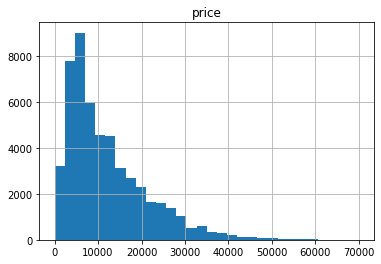

In [52]:
#Histogram Price
df.hist('price', bins=30, range=(0,70000))
plt.show()

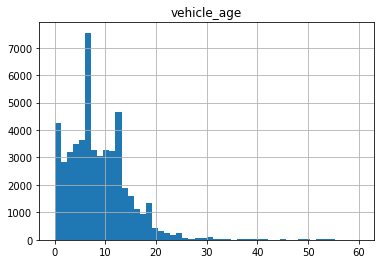

In [53]:
#Histogram vehicle_age
df.hist('vehicle_age', bins=50, range=(0, 60) )
plt.show()

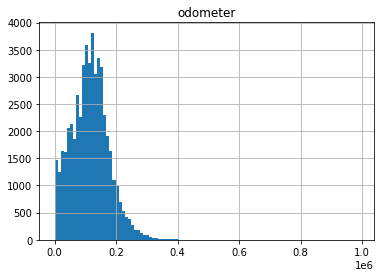

In [54]:
#Histogram odometer
df.hist('odometer', bins=100)
plt.show()

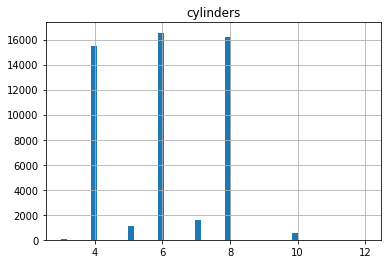

In [55]:
#Histogram cylinders
df.hist('cylinders', bins=50)
plt.show()

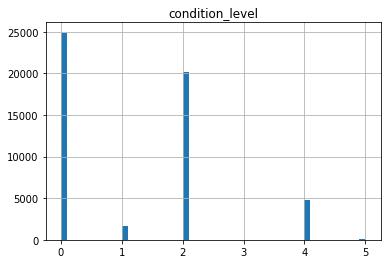

In [56]:
#Histogram condition
df.hist('condition_level', bins=50)
plt.show()

In [57]:
df_filter = df.query('2000 <= price <= 50000')

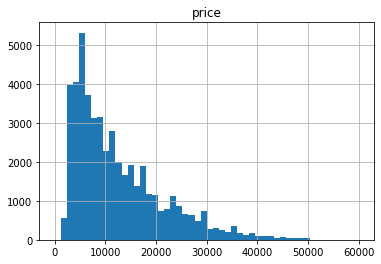

In [57]:
#Histogram Price Filter Tabel
df_filter.hist('price', bins=50, range=(0,60000))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

- The raw data with the price histogram can be seen that there is a vehicle for 1, this makes no sense
- The company determines the price of 2000 is the minimum price
- And starting at 50000 the value is sloping, the rest of the values ​​are probably outliers.
- To fix it, it is necessary to filter the table from 2000 to 50000 prices.
     
</div>

In [58]:
df_filter = df_filter.query('vehicle_age < 30')

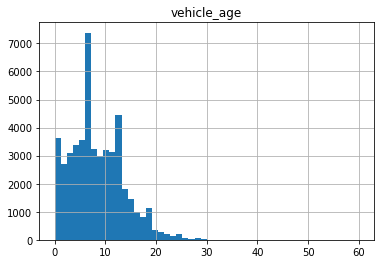

In [59]:
#Histogram vehicle_age Filter Tabel
df_filter.hist('vehicle_age', bins=50, range=(0, 60) )
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

- Raw data with vehicle_age histogram, starting at age 30, values ​​are sloping. Above 30 is probably an outlier
- To fix it, it is necessary to filter the table from the age of less than 30
     
</div>

In [60]:
df_filter = df_filter.query('odometer < 300000')

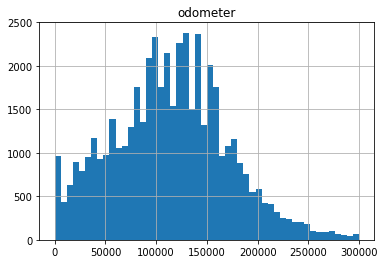

In [61]:
#Histogram average_odomter Filter Tabel
df_filter.hist('odometer', bins=50)
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

- Raw data with odometer histogram, starting from odometer 300000, values ​​are sloping. Above 300000 is probably an outlier
- A value of 0 means the vehicle has never been used or is a new vehicle
     
</div>

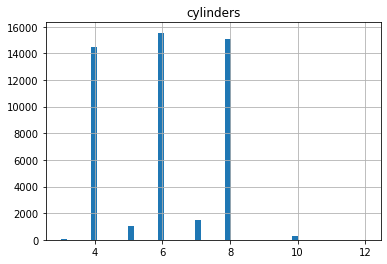

In [62]:
df_filter.hist('cylinders', bins=50)
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

Cars usually have 3,4,5,6,8,10,12,16 cylinder engines. For passenger cars, engines with 3, 4, 6 cylinders are more common. In general, the more cylinders, the higher the class of the car. So there is no need to do a filter for the cylinder column.
     
</div>

In [63]:
percent_miss = 100 - (df_filter.shape[0] / df.shape[0] * 100)

In [64]:
print('Lost raw data after creating df_filter approx ~',percent_miss, "%")

Lost raw data after creating df_filter approx ~ 6.8976225133430376 %


## Remove Outliers

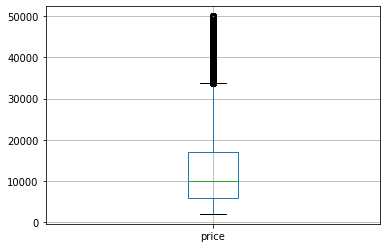

In [65]:
df_filter.boxplot('price')
plt.show()

In [66]:
q1_price = df_filter['price'].quantile(0.25)
q3_price = df_filter['price'].quantile(0.75)
iqr_price = q3_price - q1_price
lower_whisker_price = q1_price - (1.5 * iqr_price)
upper_whisker_price = q3_price + (1.5 * iqr_price)
print('Lower Whisker Price', lower_whisker_price)
print('Upper Whisker Price', upper_whisker_price)

Lower Whisker Price -11005.0
Upper Whisker Price 33795.0


In [67]:
df_new = df_filter[(df_filter['price']>lower_whisker_price) & (df_filter['price']<upper_whisker_price)]

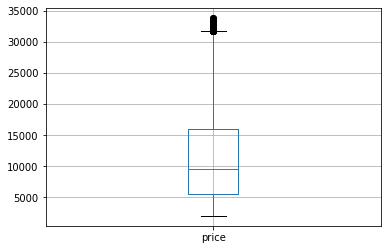

In [68]:
df_new.boxplot('price')
plt.show()

In [69]:
q1_price = df_new['price'].quantile(0.25)
q3_price = df_new['price'].quantile(0.75)
iqr_price = q3_price - q1_price
lower_whisker_price = q1_price - (1.5 * iqr_price)
upper_whisker_price = q3_price + (1.5 * iqr_price)
print('Lower Whisker Price', lower_whisker_price)
print('Upper Whisker Price', upper_whisker_price)

Lower Whisker Price -10242.5
Upper Whisker Price 31737.5


In [70]:
df_new = df_filter[(df_filter['price']>lower_whisker_price) & (df_filter['price']<upper_whisker_price)]

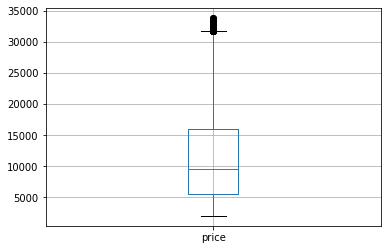

In [70]:
df_new.boxplot('price')
plt.show()

In [71]:
df_new['price'].describe()

count    46395.000000
mean     11625.853088
std       7510.529388
min       2000.000000
25%       5500.000000
50%       9500.000000
75%      15995.000000
max      33790.000000
Name: price, dtype: float64

In [72]:
df_new[df_new['price'] >= 31000]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,vehicle_age,average_odometer,condition_level
93,32000,2017,honda pilot,like new,6,gas,32104,automatic,SUV,white,False,2018-07-12,100,3,7,2018,1,32104.000000,4
160,31800,2018,chevrolet silverado 1500 crew,good,8,gas,22838,automatic,pickup,white,True,2019-01-29,29,1,1,2019,1,22838.000000,2
177,31400,2016,chevrolet silverado 1500 crew,good,8,gas,15070,automatic,pickup,black,True,2019-01-17,64,3,1,2019,3,5023.333333,2
287,31999,2011,ram 3500,good,6,diesel,148128,automatic,truck,unknown,True,2018-11-21,64,2,11,2018,7,21161.142857,2
289,32999,2012,ram 3500,good,6,diesel,126201,automatic,truck,silver,True,2018-10-26,58,4,10,2018,6,21033.500000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51082,32995,2017,ram 2500,excellent,6,diesel,81000,automatic,truck,white,True,2018-08-09,33,3,8,2018,1,81000.000000,0
51147,31990,2018,chevrolet silverado 1500,excellent,8,gas,10892,automatic,truck,silver,True,2018-11-04,57,6,11,2018,1,10892.000000,0
51187,32000,2013,ford f250 super duty,like new,8,diesel,107354,automatic,pickup,black,True,2018-05-18,77,4,5,2018,5,21470.800000,4
51283,32340,2018,ram 1500,excellent,8,gas,8394,automatic,truck,white,True,2018-05-06,14,6,5,2018,1,8394.000000,0


In [73]:
df_new.query('price >=31000 and condition == "fair"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,vehicle_age,average_odometer,condition_level


<div style="background-color:rgba(0, 255, 172, 0.07)"

- df_filter boxplot shows there are outliers around above the price of 33000
- Then create a new dataframe df_new which removes the outlier
- df_new there are still outliers around prices above 31000 but based on the descriptive table for cars at these prices there are no fair or salvage conditions
     
</div>

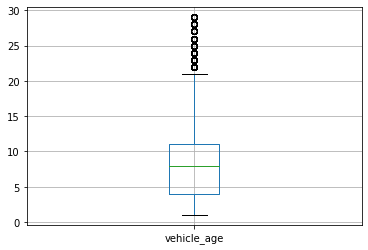

In [74]:
df_filter.boxplot('vehicle_age')
plt.show()

In [77]:
q1_vehicle_age = df_new['vehicle_age'].quantile(0.25)
q3_vehicle_age = df_new['vehicle_age'].quantile(0.75)
iqr_vehicle_age = q3_vehicle_age - q1_vehicle_age
lower_whisker_vehicle_age = q1_vehicle_age - (1.5 * iqr_vehicle_age)
upper_whisker_vehicle_age = q3_vehicle_age + (1.5 * iqr_vehicle_age)
print('Lower Whisker vehicle_age', lower_whisker_vehicle_age)
print('Upper Whisker vehicle_age', upper_whisker_vehicle_age)

Lower Whisker vehicle_age -5.5
Upper Whisker vehicle_age 22.5


In [78]:
df_new = df_new[(df_new['vehicle_age']>lower_whisker_vehicle_age) & (df_new['vehicle_age']<upper_whisker_vehicle_age)]

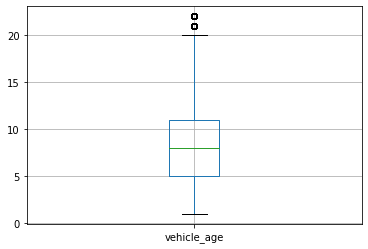

In [79]:
df_new.boxplot('vehicle_age')
plt.show()

In [80]:
q1_vehicle_age = df_new['vehicle_age'].quantile(0.25)
q3_vehicle_age = df_new['vehicle_age'].quantile(0.75)
iqr_vehicle_age = q3_vehicle_age - q1_vehicle_age
lower_whisker_vehicle_age = q1_vehicle_age - (1.5 * iqr_vehicle_age)
upper_whisker_vehicle_age = q3_vehicle_age + (1.5 * iqr_vehicle_age)
print('Lower Whisker vehicle_age :', lower_whisker_vehicle_age)
print('Upper Whisker vehicle_age :', upper_whisker_vehicle_age)

Lower Whisker vehicle_age : -4.0
Upper Whisker vehicle_age : 20.0


In [81]:
df_new = df_new[(df_new['vehicle_age']>lower_whisker_vehicle_age) & (df_new['vehicle_age']<upper_whisker_vehicle_age)]

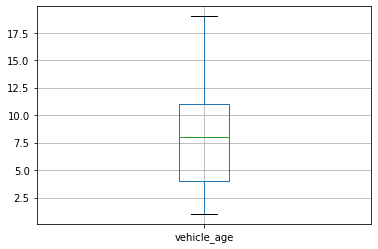

In [82]:
df_new.boxplot('vehicle_age')
plt.show()

In [83]:
df_new['vehicle_age'].describe()

count    45093.000000
mean         8.042313
std          4.505030
min          1.000000
25%          4.000000
50%          8.000000
75%         11.000000
max         19.000000
Name: vehicle_age, dtype: float64

In [84]:
df_new.query('vehicle_age > 20')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,vehicle_age,average_odometer,condition_level


In [85]:
df_new.query('vehicle_age > 20 and condition == "fair"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,vehicle_age,average_odometer,condition_level


<div style="background-color:rgba(0, 255, 172, 0.07)"

- df_new['vehicle_age'] removes outliers from vehicles older than 22.5 years.
- There are still outliers over the age of 20, and if filtered based on conditions, there are still many that are in fair condition
- Maybe there is a connection the longer the age of the vehicle the less its condition

</div>

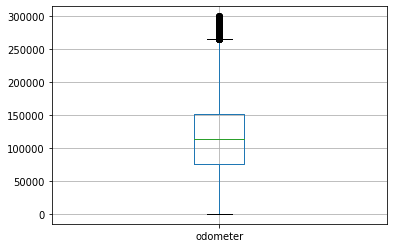

In [86]:
df_filter.boxplot('odometer')
plt.show()

In [87]:
q1_odometer = df_new['odometer'].quantile(0.25)
q3_odometer = df_new['odometer'].quantile(0.75)
iqr_odometer = q3_odometer - q1_odometer
lower_whisker_odometer = q1_odometer - (1.5 * iqr_odometer)
upper_whisker_odometer = q3_odometer + (1.5 * iqr_odometer)
print('Lower Whisker odometer :', lower_whisker_odometer)
print('Upper Whisker odometer :', upper_whisker_odometer)

Lower Whisker odometer : -31186.0
Upper Whisker odometer : 260702.0


In [88]:
df_new = df_new[(df_new['odometer']>lower_whisker_odometer) & (df_new['odometer']<upper_whisker_odometer)]

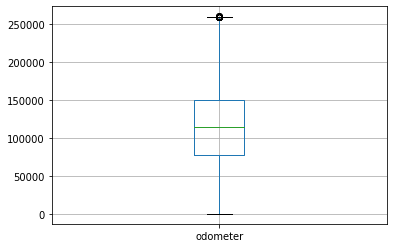

In [89]:
df_new.boxplot('odometer')
plt.show()

In [90]:
q1_odometer = df_new['odometer'].quantile(0.25)
q3_odometer = df_new['odometer'].quantile(0.75)
iqr_odometer = q3_odometer - q1_odometer
lower_whisker_odometer = q1_odometer - (1.5 * iqr_odometer)
upper_whisker_odometer = q3_odometer + (1.5 * iqr_odometer)
print('Lower Whisker odometer :', lower_whisker_odometer)
print('Upper Whisker odometer :', upper_whisker_odometer)

Lower Whisker odometer : -30669.0
Upper Whisker odometer : 259099.0


In [91]:
df_new = df_new[(df_new['odometer']>lower_whisker_odometer) & (df_new['odometer']<upper_whisker_odometer)]

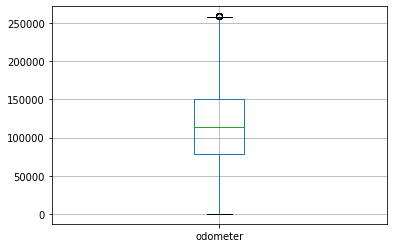

In [92]:
df_new.boxplot('odometer')
plt.show()

In [93]:
df_new['odometer'].describe()

count     44668.000000
mean     113491.669092
std       53467.180527
min           0.000000
25%       77975.500000
50%      114240.500000
75%      150334.000000
max      259000.000000
Name: odometer, dtype: float64

In [94]:
df_new.query('odometer > 260000 and condition == "fair"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,vehicle_age,average_odometer,condition_level


<div style="background-color:rgba(0, 255, 172, 0.07)"

- df_new['odometer'] removes outliers from mileage above 262229
- There are still outliers over the age of 260000, and if filtered based on conditions there are only 2 that are in fair condition
- So the car with the odometer is still quite fit for sale

</div>

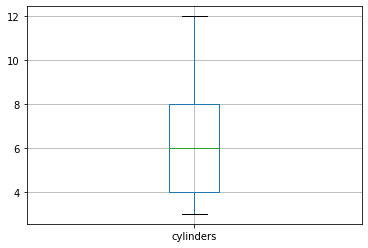

In [95]:
df_filter.boxplot('cylinders')
plt.show()

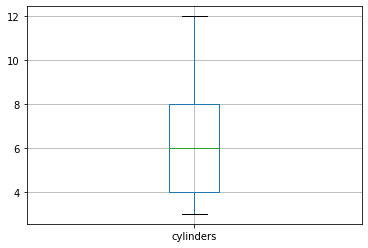

In [96]:
df_new.boxplot('cylinders')
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

df_filter and df_new for cylinders indicate a low probability of outliers

</div>

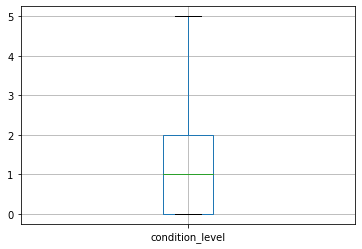

In [97]:
df_filter.boxplot('condition_level')
plt.show()

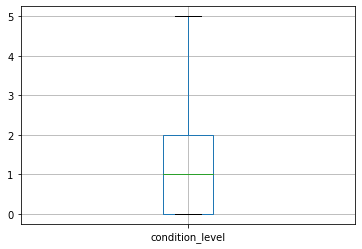

In [98]:
df_new.boxplot('condition_level')
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

- df_filter and df_new for condition_level indicate low probability of outliers

</div>

In [99]:
percent_miss_new = 100 - (df_new.shape[0] / df.shape[0] * 100)

In [100]:
print('Lost raw data after creating df_new approx ~',percent_miss_new, "%")

Lost raw data after creating df_new approx ~ 13.308102862688017 %


## Parameters Without Outliers

In [100]:
df_new.describe()
df_new.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_posted,month_posted,year_posted,vehicle_age,average_odometer,condition_level
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,20714.285714,2
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,9,9856.111111,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000,0
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488.500000,0


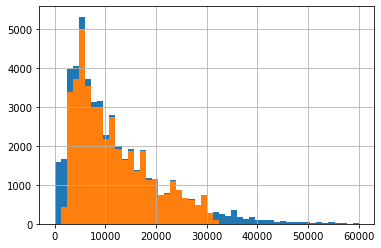

In [101]:
df['price'].hist(bins=50, range=(0,60000))
df_new['price'].hist(bins=50, range=(0,60000))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

- Raw data for prices still has prices from 0 to 2000, and prices above 33000
- After filtering the price doesn't exist
                                  
</div>

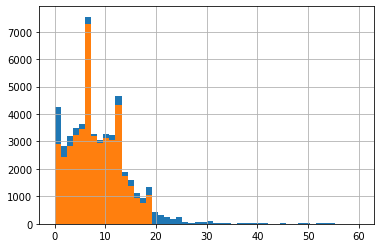

In [101]:
df['vehicle_age'].hist(bins=50, range=(0,60))
df_new['vehicle_age'].hist(bins=50, range=(0,60))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

- Raw data for vehicle_age with unfiltered data is not much different
- The striking difference is that the filtered data no longer has vehicles over 22 years old
</div>

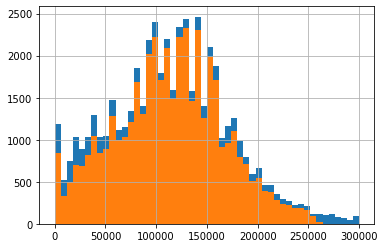

In [102]:
df['odometer'].hist(bins=50, range=(0,300000))
df_new['odometer'].hist(bins=50, range=(0,300000))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"

- Raw data for odometer with unfiltered data is also not much different
- The striking difference is that the filtered data no longer has distances above 262000

</div>

## Ads Validity Period

In [104]:
df_new['days_listed'].describe()

count    44668.000000
mean        39.567453
std         28.212837
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

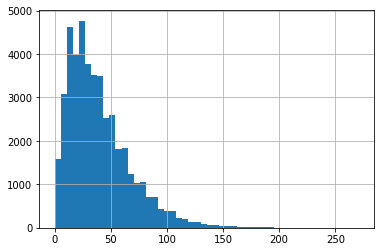

In [105]:
df_new['days_listed'].hist(bins=50)
plt.show()

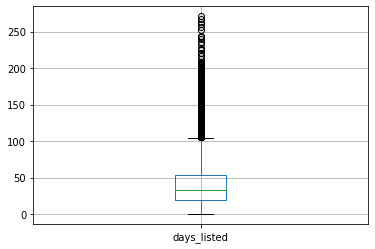

In [106]:
df_new.boxplot('days_listed')
plt.show()

In [107]:
q1_days_listed = df_new['days_listed'].quantile(0.25)
q3_days_listed = df_new['days_listed'].quantile(0.75)
iqr_days_listed = q3_days_listed - q1_days_listed
lower_whisker_days_listed = q1_days_listed - (1.5 * iqr_days_listed)
upper_whisker_days_listed = q3_days_listed + (1.5 * iqr_days_listed)
print('Lower Whisker days_listed :', lower_whisker_days_listed)
print('Upper Whisker days_listed :', upper_whisker_days_listed)

Lower Whisker days_listed : -32.0
Upper Whisker days_listed : 104.0


In [108]:
df_new.query('days_listed > 104').shape[0]

1397

In [109]:
df_new.loc[df_new['days_listed'] == 0].shape[0]
df_new.query('days_listed == 0').shape[0]

46

<div style="background-color:rgba(0, 255, 172, 0.07)"

- Ads serve an average of 33 to 39 days
- There are cars that are sold immediately after the advertisement is shown, there are 46 cars in total
- The longest car sold is over 104 days, there are 1426 cars in total

</div>

In [110]:
df_new = df_new[(df_new['days_listed']>lower_whisker_days_listed) & (df_new['days_listed']<upper_whisker_days_listed)]

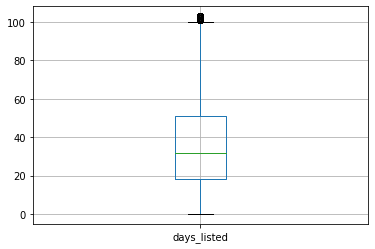

In [111]:
df_new.boxplot('days_listed')
plt.show()

In [112]:
q1_days_listed = df_new['days_listed'].quantile(0.25)
q3_days_listed = df_new['days_listed'].quantile(0.75)
iqr_days_listed = q3_days_listed - q1_days_listed
lower_whisker_days_listed = q1_days_listed - (1.5 * iqr_days_listed)
upper_whisker_days_listed = q3_days_listed + (1.5 * iqr_days_listed)
print('Lower Whisker days_listed :', lower_whisker_days_listed)
print('Upper Whisker days_listed :', upper_whisker_days_listed)

Lower Whisker days_listed : -31.5
Upper Whisker days_listed : 100.5


In [113]:
df_new = df_new[(df_new['days_listed']>lower_whisker_days_listed) & (df_new['days_listed']<upper_whisker_days_listed)]

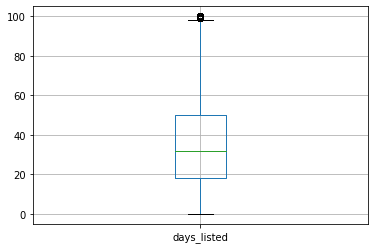

In [114]:
df_new.boxplot('days_listed')
plt.show()

## Average Price of Each Type of Vehicle

In [115]:
df_new['price'].describe()

count    42986.000000
mean     11853.663891
std       7542.000847
min       2000.000000
25%       5899.000000
50%       9900.000000
75%      16500.000000
max      33790.000000
Name: price, dtype: float64

In [116]:
pivot_type = df_new.pivot_table(index=['type'], values=['date_posted', 'price'], aggfunc={'date_posted':'count', 'price':'median'})
pivot_type = pivot_type.rename(columns={
    'date_posted' : 'count_date_posted',
    'price' : 'median_price'
}).sort_values(by='count_date_posted', ascending=False)

In [117]:
pivot_type

,count_date_posted,median_price
type,,
sedan,10641,6500
SUV,10583,8995
truck,9926,15000
pickup,5662,14950
coupe,1702,15700
wagon,1363,7995
mini-van,1026,6995
hatchback,912,6000
van,510,7995


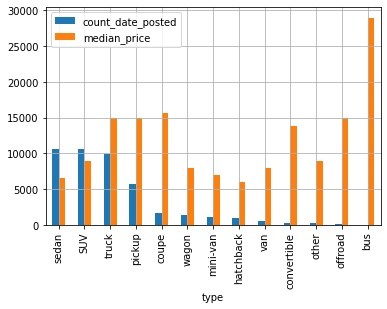

In [118]:
pivot_type.plot(kind='bar', grid=True)
plt.show()

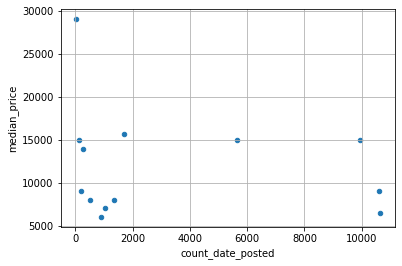

In [119]:
pivot_type.plot(x='count_date_posted', y='median_price', kind='scatter', grid=True)
plt.show()

In [120]:
pivot_type['count_date_posted'].corr(pivot_type['median_price'])

-0.18014219496400627

<div style="background-color:rgba(0, 255, 172, 0.07)"

- Scatter plot pivot_type shows the number of fish from 0 to below 2000, the median price varies
- In the number of ads 6000 to 11000 the median price is around 15000
- In the number of ads above 11,000 the median price ranges from 5,000 to 1,000
- The correlation between the number of advertisements displayed and the median price is -0.15, almost close to 0, which means that the correlation is very weak
- The pivot_type table and bar chart show the 2 vehicles with the most number of ads being SUVs and Sedans
     
</div>

## Price Factor

In [121]:
df_new_suv = df_new[df_new['type'] == 'SUV'].reset_index(drop=True)

In [122]:
df_new_suv.shape[0]

10583

In [123]:
df_new_suv.corr()['price']

price               1.000000
model_year          0.657203
cylinders           0.028875
odometer           -0.613962
is_4wd              0.125914
days_listed        -0.016063
week_posted         0.011511
month_posted       -0.005326
year_posted        -0.000483
vehicle_age        -0.652260
average_odometer    0.265951
condition_level    -0.006156
Name: price, dtype: float64

In [124]:
df_new_suv_cor = df_new_suv[['price', 'vehicle_age', 'odometer', 'condition_level', 'transmission', 'paint_color']]
#df_new_suv_cor

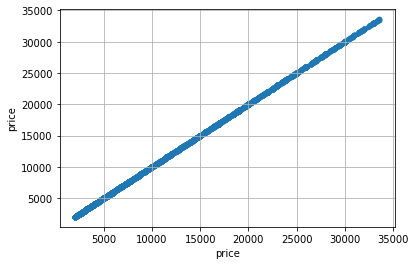

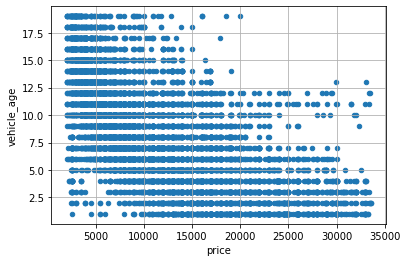

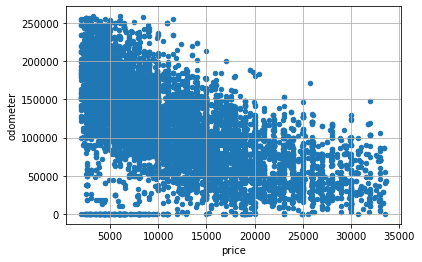

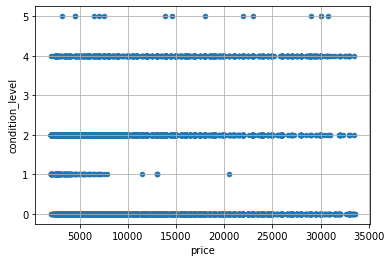

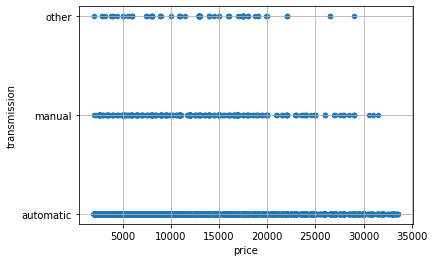

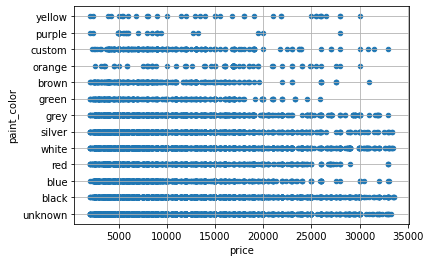

In [125]:
group_data = ['price', 'vehicle_age', 'odometer', 'condition_level', 'transmission', 'paint_color']
for group_data in df_new_suv_cor:
    df_new_suv_cor.plot(x='price', y=group_data, kind='scatter', grid=True)

In [126]:
df_new_suv.groupby('transmission')['date_posted'].count()

transmission
automatic    10108
manual         390
other           85
Name: date_posted, dtype: int64

In [127]:
df_new_suv_paint = df_new_suv.groupby('paint_color')['date_posted'].count().sort_values(ascending=False)
df_new_suv_paint

paint_color
unknown    1899
black      1856
white      1665
silver     1397
grey       1046
blue        897
red         771
green       333
brown       317
custom      254
orange       77
yellow       38
purple       33
Name: date_posted, dtype: int64

In [128]:
df_new_suv_2 = df_new_suv.loc[(df_new_suv['paint_color'] != 'yellow') & (df_new_suv['paint_color'] != 'purple')]
df_new_suv_2['paint_color'].value_counts()

unknown    1899
black      1856
white      1665
silver     1397
grey       1046
blue        897
red         771
green       333
brown       317
custom      254
orange       77
Name: paint_color, dtype: int64

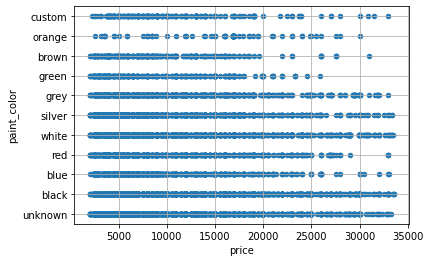

In [129]:
df_new_suv_2
df_new_suv_2.plot(x='price', y='paint_color', kind='scatter', grid=True)
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*Price correlation with several things for SUV type cars
     
- The correlation between price and vehicle_age is -0.6 (Strong Negative Correlation), meaning that the higher the price, the lower the vehicle_age, this can be proven in the scatter where many vehicles in their 20s cost around 5000, and with a price of 35000 the maximum vehicle age is 12 years
- The price correlation with the odometer is -0.6 (Strong Negative Correlation), meaning that the higher the price, the lower the odometer, this can also be seen in the scatter
- Price correlation with condition_level, transmission, and paint_color is very weak

</div>

In [130]:
df_new_sedan = df_new[df_new['type'] == 'sedan'].reset_index(drop=True)

In [131]:
df_new_sedan.shape[0]

10641

In [132]:
df_new_sedan.corr()['price']

price               1.000000
model_year          0.689444
cylinders           0.018413
odometer           -0.631791
is_4wd              0.112577
days_listed        -0.001347
week_posted         0.000198
month_posted       -0.014132
year_posted         0.015141
vehicle_age        -0.678508
average_odometer    0.277909
condition_level     0.002393
Name: price, dtype: float64

In [133]:
df_new_sedan_cor = df_new_sedan[['price', 'vehicle_age', 'odometer', 'condition_level', 'transmission', 'paint_color']]

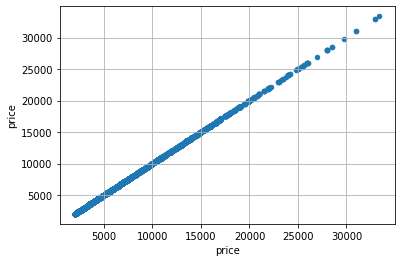

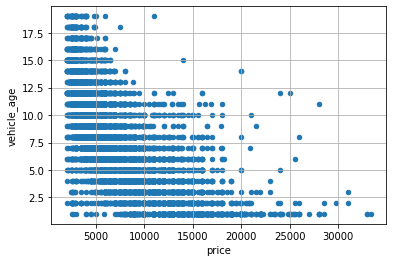

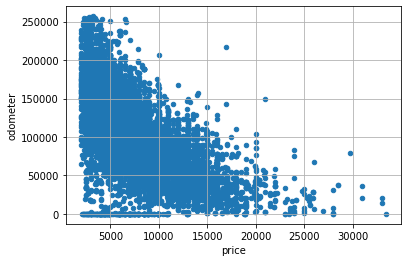

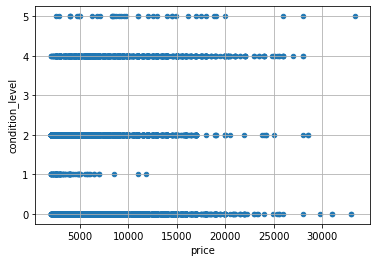

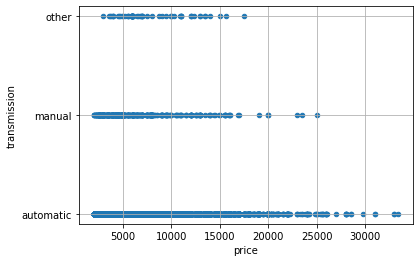

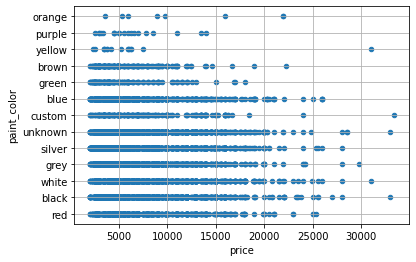

In [134]:
for group_data in df_new_sedan_cor:
    df_new_sedan_cor.plot(x='price', y=group_data, kind='scatter', grid=True)

In [135]:
df_new_sedan.groupby('transmission')['date_posted'].count()

transmission
automatic    10094
manual         481
other           66
Name: date_posted, dtype: int64

In [136]:
df_new_sedan_paint = df_new_sedan.groupby('paint_color')['date_posted'].count().sort_values(ascending=False)
df_new_sedan_paint

paint_color
unknown    1899
silver     1814
black      1578
grey       1481
white      1314
blue       1075
red         807
custom      242
brown       221
green       166
purple       20
yellow       16
orange        8
Name: date_posted, dtype: int64

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
- The price correlation with a number of things for Sedan type cars is similar to the correlation for SUV type cars
     
</div>

## General Conclusion

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*Raw Data (df)
- No duplicate values
- Missing values ​​are in model_year, cylinder, odometer, paint_color, and is_4wd
- Overcome missing values ​​with the median and mean functions, especially for the paint_color column filled with unknown,
and is_4wd with 0
- Fixed data types for model__year, cylinder, odomter, is_4wd, and date_posted

*Clean Data (df_new)
- Removed outliers in the column price, vehicle_age, odometer for better analysis
- Compare raw data histograms with clean data

*The purpose of this task is to find factors that affect vehicle prices, from the scatter created it can be concluded:
- Price correlation with vehicle_age is -0.6 (Strong Negative Correlation)
- The price correlation with the odometer is -0.6 (Strong Negative Correlation)
- Price correlation with condition_level, transmission, and paint_color is very weak

</div>